In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, solve


In [45]:
## Now the first thing to do here is establish the necessary constants. Drag coeffecients are one. 
Cp=1
Cf=1
rho=1000
Acir=np.pi*0.0875**2
Aplate=.495
a=0.0875
L=0.1
b=0.3
v_water=1e-6


## Now that we have these values let's see if that we make a log value of the necessary viscosity values
viscosity = np.linspace(1,1e4*v_water,num=20)

## Now we want to be able to solve the function for u given the function I have written down in the page.
v= viscosity[9]
print(v)
u = symbols('u')
## I'm just going to calculate the factors out front mathematically. used mathematica, otherwise the code was to messy 
expr = 94.8683*v**(1/2)*u**(5/2)+259.526*u**3+350*v*u**2 - 259.62


sol = solve(expr)
print(sol)

In [46]:
## To loop through the method let's do the following 
result = np.zeros(len(viscosity))
i=0
while i < len(viscosity):
    u = symbols('u')
    v = viscosity[i]
    expr = 94.8683*v**(1/2)*u**(5/2)+259.526*u**3+350*v*u**2 - 259.62
    sol = solve(expr)
    result[i] = sol[0]
    i+=1

[0.65889455 0.6685832  0.67868836 0.68924037 0.70027297 0.7118238
 0.72393512 0.73665472 0.75003711 0.76414508 0.77905191 0.7948445
 0.81162813 0.82953397 0.84873184 0.86945399 0.89204512 0.91708867
 0.94584425 0.98381142]


Text(0.5, 0, 'Logarithmic Scale of Viscosity (m^2 s^-1)')

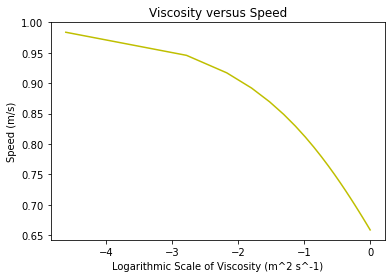

In [47]:
print(result)
log = np.log(viscosity)
plt.plot(log,result,color='y')
plt.title('Viscosity versus Speed')
plt.ylabel('Speed (m/s)')
plt.xlabel('Logarithmic Scale of Viscosity (m^2 s^-1)')

Text(0.5, 0, 'Logarithmic Scale of Viscosity (m^2 s^-1)')

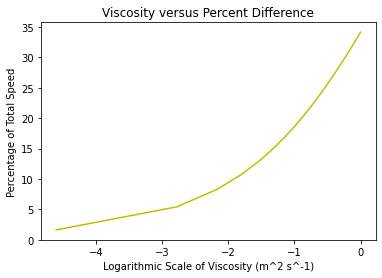

In [48]:
## Now continuing to analyze this situation, lets plot the y axis as the percentage difference from the optimal speed.

def percentage(speeds):
    perc = np.zeros(len(speeds))
    counter = 0
    for i in speeds:
        val = (1-i)*100
        perc[counter] = val
        counter+=1
    return perc

## Now to get the percentage on the plot against the log of the viscosity of water.

percentages = percentage(result)
plt.plot(log,percentages,color='y')
plt.title('Viscosity versus Percent Difference')
plt.ylabel('Percentage of Total Speed')
plt.xlabel('Logarithmic Scale of Viscosity (m^2 s^-1)')

    

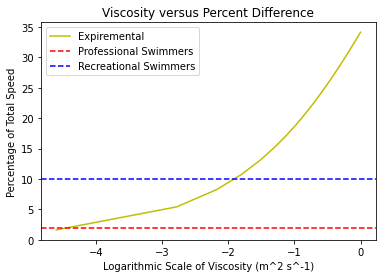

In [66]:
## Now I need to plot the margin of error for the professional swimmers. If we have .01 of a seconds and .1 seconds for recreational. According to :
# https://chasethewater.com/how-fast-do-elite-swimmers-swim-data-included/
prof = 0.02*100
rec = 0.1*100
plt.plot(log,percentages,color='y',label="Expiremental")
plt.title('Viscosity versus Percent Difference')
plt.ylabel('Percentage of Total Speed')
plt.xlabel('Logarithmic Scale of Viscosity (m^2 s^-1)')
plt.axhline(prof, color='r', linestyle='dashed',label="Professional Swimmers")
plt.axhline(rec, color='b', linestyle='dashed',label="Recreational Swimmers")
plt.legend(loc="upper left")
plt.show()

